# Question D2

*Question*: Which country do you currently work in?

*Answer Type*: Single Option

*Options*: [All Countries]

### Necessary Libraries

In [1]:
import pandas as pd
from utils.basic import rename_values
from utils.dataframe import DataframeUtils
from utils.plot import PlotUtils
from utils.bootstrapping import BootstrappingUtils

### Dataframe Init

In [2]:
dataframe_obj = DataframeUtils('./data/main_data.csv', ';', './data/unused_columns.txt', './data/formatted_columns.txt')
# the index is not important, but when we internally format df we need to reset index
dataframe_obj.df = dataframe_obj.df.reset_index(drop=True)

In [3]:
# For PROFES, we discarded suspended submissions (e.g., remove those who didn't complete the survey).
dataframe_obj.df.drop(dataframe_obj.df[dataframe_obj.df['Status'] == 'Suspended (22)'].index, inplace = True)

### Basic Analysis

In [4]:
dataframe_obj.df['D2_Country'].head()

0     Brazil
1     Brazil
2     Brazil
3    Germany
4     Brazil
Name: D2_Country, dtype: object

In [5]:
dataframe_obj.df['D2_Country']

0        Brazil
1        Brazil
2        Brazil
3       Germany
4        Brazil
         ...   
183    Portugal
184     Germany
185      Brazil
186      Brazil
187      Brazil
Name: D2_Country, Length: 188, dtype: object

In [6]:
# cleaning data
dataframe_obj.remove_value_from_df('0','D2_Country')

In [7]:
# barplot data
indexes = list(dataframe_obj.df['D2_Country'].value_counts().index)
values = list(dataframe_obj.df['D2_Country'].value_counts())

In [8]:
# plot object
d2_plot = PlotUtils(pd.DataFrame(
    data={'Countries': indexes, 'Answers': values}
))

In [9]:
d2_plot.df

,Countries,Answers
0,Brazil,72
1,Turkey,31
2,Austria,14
3,Germany,10
4,Sweden,8
5,Italy,7
6,Portugal,5
7,Canada,4
8,Colombia,3
9,Spain,2


C:\Users\Antonio Pedro Alves\.virtualenvs\pfp-antonio-pedro-aVZriNVE\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


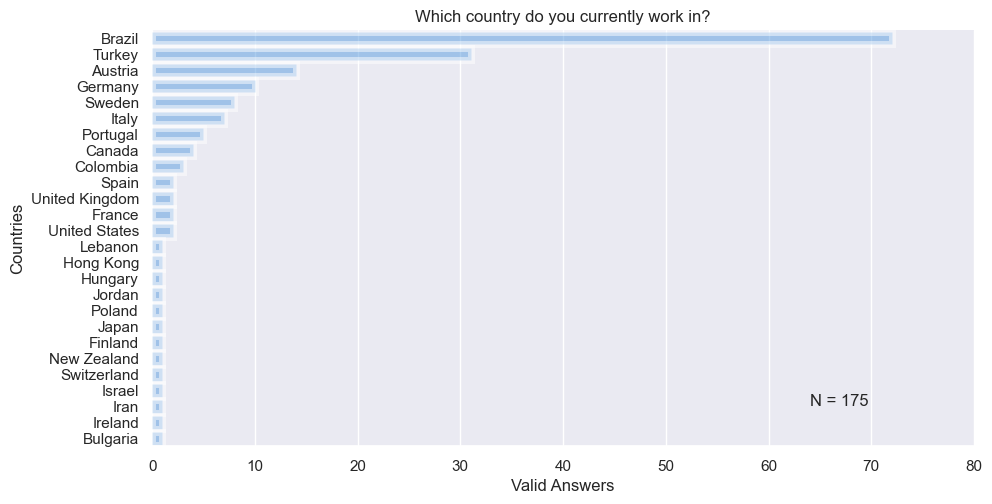

In [10]:
total_answers = 'N = ' + str(len(list(dataframe_obj.df['D2_Country'])))
total_answers_int = len(list(dataframe_obj.df['D2_Country']))

d2_plot.single_barplot(x_axis="Answers", y_axis="Countries", 
                       title="Which country do you currently work in?",
                       x_label="Valid Answers", y_label="Countries", x_label_rotation=0, color="#429bf5", total_answers=total_answers)

### Bootstrapping Analysis

In [11]:
valid_options_list = list(dataframe_obj.df['D2_Country'].unique())
valid_answers_list = list(dataframe_obj.df['D2_Country'])

In [12]:
replacements = 1000
population_sample_size = total_answers_int # equals n - total valid answers

bootstrapping_obj = BootstrappingUtils(valid_answers_list, valid_options_list, replacements, population_sample_size, 95)

In [13]:
bootstrapped_dict_data = bootstrapping_obj.bootstrapping('single')

In [14]:
# get a pair of values between dict key and all the list values inside that key 
# key: [val_1, val_2] ---> [(key, val_1), (key, val_2)...]
indexes = []
values = []
for idx in bootstrapped_dict_data:
    indexes += [idx for _ in range(len(bootstrapped_dict_data[idx]['population']))]
    values += bootstrapped_dict_data[idx]['population']

In [15]:
values = [100 * v for v in values]

In [16]:
# plot object for bootstrapped data
d2_boot_plot = PlotUtils(pd.DataFrame(
    data={'Country': indexes, 'Value': values}
).sort_values(by=['Value'], ascending=False))

C:\Users\Antonio Pedro Alves\.virtualenvs\pfp-antonio-pedro-aVZriNVE\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


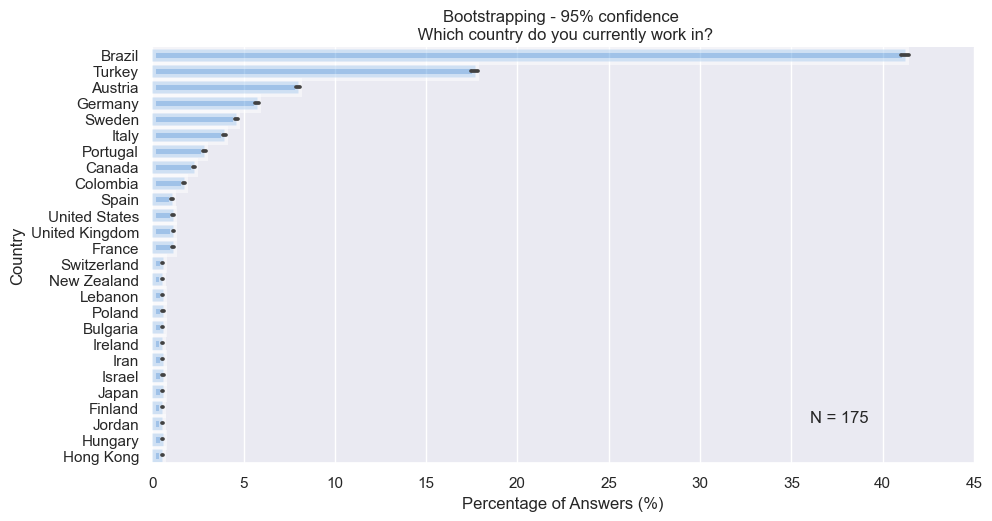

In [17]:
d2_boot_plot.single_barplot(x_axis="Value", y_axis="Country", 
                       title="Bootstrapping - 95% confidence \n Which country do you currently work in?",
                       x_label="Percentage of Answers (%)", y_label="Country", x_label_rotation=0, color="#429bf5", total_answers=total_answers)

In [18]:
# confidence for each option
print("Option: (Lower Value, Mean, Upper Value)")
for idx in bootstrapped_dict_data:
    print(idx + ':' + str(bootstrapped_dict_data[idx]['confidence']))

Option: (Lower Value, Mean, Upper Value)
Brazil:(0.4098465545982825, 0.4120742857142857, 0.41430201683028894)
Germany:(0.05652852408601145, 0.057634285714285714, 0.05874004734255998)
Sweden:(0.045153600082769134, 0.04611428571428572, 0.047074971345802304)
Colombia:(0.016606267431857905, 0.017217142857142858, 0.01782801828242781)
France:(0.011060293921120451, 0.011559999999999997, 0.012059706078879543)
United Kingdom:(0.011130848205892063, 0.011622857142857141, 0.01211486607982222)
Turkey:(0.17463905391419798, 0.17650285714285713, 0.17836666037151627)
New Zealand:(0.005163829753816281, 0.005542857142857144, 0.005921884531898006)
Finland:(0.0051383192402053935, 0.005508571428571429, 0.005878823616937464)
Italy:(0.038538458301802726, 0.039531428571428565, 0.0405243988410544)
Austria:(0.0786435463375168, 0.07986857142857141, 0.08109359651962603)
Ireland:(0.005257207631287902, 0.005622857142857143, 0.005988506654426384)
Iran:(0.005343090921660353, 0.005708571428571428, 0.0060740519354825035

In [19]:
# confidence for each option
print("Option: (Lower Value, Mean, Upper Value)")
for idx in bootstrapped_dict_data:
    print(idx + ':: P = ' + str(round((bootstrapped_dict_data[idx]['confidence'][1] * 100), 3)) + " [" + str(round((bootstrapped_dict_data[idx]['confidence'][0] * 100), 3)) + ", " + str(round((bootstrapped_dict_data[idx]['confidence'][2] * 100), 3)) + "]")

Option: (Lower Value, Mean, Upper Value)
Brazil:: P = 41.207 [40.985, 41.43]
Germany:: P = 5.763 [5.653, 5.874]
Sweden:: P = 4.611 [4.515, 4.707]
Colombia:: P = 1.722 [1.661, 1.783]
France:: P = 1.156 [1.106, 1.206]
United Kingdom:: P = 1.162 [1.113, 1.211]
Turkey:: P = 17.65 [17.464, 17.837]
New Zealand:: P = 0.554 [0.516, 0.592]
Finland:: P = 0.551 [0.514, 0.588]
Italy:: P = 3.953 [3.854, 4.052]
Austria:: P = 7.987 [7.864, 8.109]
Ireland:: P = 0.562 [0.526, 0.599]
Iran:: P = 0.571 [0.534, 0.607]
Canada:: P = 2.288 [2.224, 2.352]
Israel:: P = 0.582 [0.545, 0.619]
United States:: P = 1.15 [1.097, 1.202]
Switzerland:: P = 0.572 [0.535, 0.609]
Spain:: P = 1.102 [1.05, 1.155]
Portugal:: P = 2.861 [2.779, 2.942]
Lebanon:: P = 0.578 [0.542, 0.613]
Japan:: P = 0.577 [0.54, 0.615]
Poland:: P = 0.585 [0.549, 0.62]
Jordan:: P = 0.558 [0.524, 0.592]
Hungary:: P = 0.573 [0.537, 0.61]
Hong Kong:: P = 0.557 [0.523, 0.592]
Bulgaria:: P = 0.567 [0.532, 0.603]
